
# [3](https://r4ds.had.co.nz/data-visualisation.html)&nbsp;&nbsp;&nbsp;Data visualisation

## [3.1](https://r4ds.had.co.nz/data-visualisation.html#introduction-1)&nbsp;&nbsp;&nbsp;Introduction

> "The simple graph has brought more information to the data analyst’s mind 
> than any other device." --- John Tukey

This post will teach you how to visualise your data using plotnine. Python has many packages for making graphs, but plotnine is one of the most elegant and most versatile. plotnine implements the __grammar of graphics__, a coherent system for describing and building graphs. With plotnine, you can do more faster by learning one system and applying it in many places.

If you'd like to learn more about the theoretical underpinnings of plotnine before you start, I'd recommend reading [The Layered Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.pdf).  
### [3.1.1](https://r4ds.had.co.nz/data-visualisation.html#prerequisites-1)&nbsp;&nbsp;&nbsp;Prerequisites

This post focusses on plotnine. We'll also use a little numpy and pandas for data manipulation. To access the datasets, help pages, and functions that we will use in this post, import the necessary packages by running this code:

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [2]:
import warnings
from matplotlib import rcParams

pd.set_option("display.max_rows", 10)
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight",
                 "savefig.dpi": 300,
                 "savefig.format": "svg",
                 "text.usetex": True})
                 
theme_set(theme_gray(base_size=13))

# [28](https://r4ds.had.co.nz/graphics-for-communication.html)&nbsp;&nbsp;&nbsp;Graphics for communication

## [28.1](https://r4ds.had.co.nz/graphics-for-communication.html#introduction-19)&nbsp;&nbsp;&nbsp;Introduction

Now that you understand your data, you need to _communicate_ your understanding to others. Your audience will likely not share your background knowledge and will not be deeply invested in the data. To help others quickly build up a good mental model of the data, you will need to invest considerable effort in making your plots as self-explanatory as possible. In this chapter, you'll learn some of the tools that plotnine provides to do so.

The rest of this post focuses on the tools you need to create good graphics. I assume that you know what you want, and just need to know how to do it. For that reason, I highly recommend pairing this chapter with a good general visualisation book. I particularly like [_The Truthful Art_](https://amzn.com/0321934075), by Albert Cairo. It doesn't teach the mechanics of creating visualisations, but instead focuses on what you need to think about in order to create effective graphics.

## [28.2](https://r4ds.had.co.nz/graphics-for-communication.html#label)&nbsp;&nbsp;&nbsp;Label

The easiest place to start when turning an exploratory graphic into an expository graphic is with good labels. You add labels with the `labs()` function. This example adds a plot title:

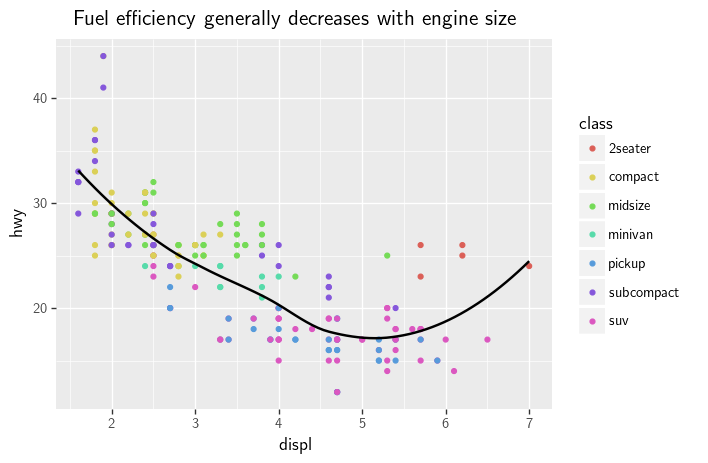

<ggplot: (297706237)>

In [3]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Fuel efficiency generally decreases with engine size")

The purpose of a plot title is to summarise the main finding. Avoid titles that just describe what the plot is, e.g. "A scatterplot of engine displacement vs. fuel economy".

You can also use `labs()` to replace the axis and legend titles. It's usually a good idea to replace short variable names with more detailed descriptions, and to include the units.

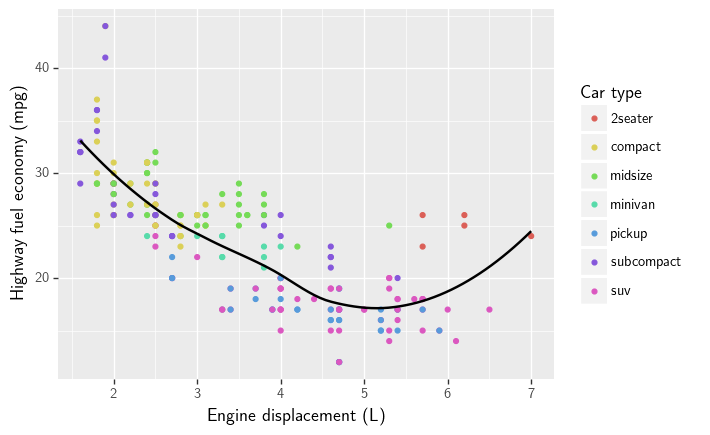

<ggplot: (298094757)>

In [4]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Engine displacement (L)",
     y="Highway fuel economy (mpg)",
     colour="Car type")

It's possible to use mathematical equations instead of text strings. You have to tell matplotlib, which is used by plotnine to do the actuall plotting, to use LaTeX for rendering text:

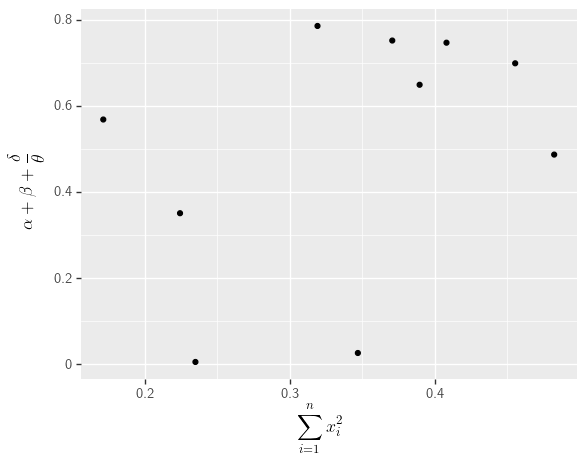

<ggplot: (298398729)>

In [5]:
from matplotlib import rc
rc('text', usetex=True)

df = pd.DataFrame({"x": np.random.uniform(size=10),
                   "y": np.random.uniform(size=10)})

ggplot(df, aes("x", "y")) +\
geom_point() +\
labs(x="$$\\sum_{i = 1}^n{x_i^2}$$",
     y="$$\\alpha + \\beta + \\frac{\\delta}{\\theta}$$")

See [the matplotlib documentation](https://matplotlib.org/3.1.1/tutorials/text/mathtext.html) for more information about how to write mathematical equations using LaTeX.

### [28.2.1](https://r4ds.had.co.nz/graphics-for-communication.html#exercises-71)&nbsp;&nbsp;&nbsp;Exercises

1.  Create one plot on the fuel economy data with customised `title`, `x`, `y`, and `colour` labels.

1.  The `geom_smooth()` is somewhat misleading because the `hwy` for large engines is skewed upwards due to the inclusion of lightweight sports cars with big engines. Use your modelling tools to fit and display a better model.

1.  Take an exploratory graphic that you've created in the last month, and add an informative title to make it easier for others to understand.

## [28.3](https://r4ds.had.co.nz/graphics-for-communication.html#annotations)&nbsp;&nbsp;&nbsp;Annotations

In addition to labelling major components of your plot, it's often useful to label individual observations or groups of observations. The first tool you have at your disposal is `geom_text()`. `geom_text()` is similar to `geom_point()`, but it has an additional aesthetic: `label`. This makes it possible to add textual labels to your plots.

There are two possible sources of labels. First, you might have a DataFrame that provides labels. The plot below isn't terribly useful, but it illustrates a useful approach: pull out the most efficient car in each class with pandas, and then label it on the plot:

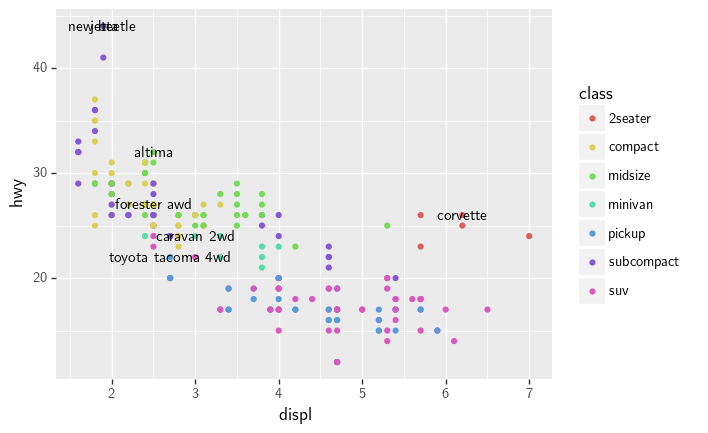

<ggplot: (297851705)>

In [6]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

This is hard to read because the labels overlap with each other, and with the points. We can make things a little better by switching to `geom_label()` which draws a rectangle behind the text. We also use the `nudge_y` parameter to move the labels slightly above the corresponding points:

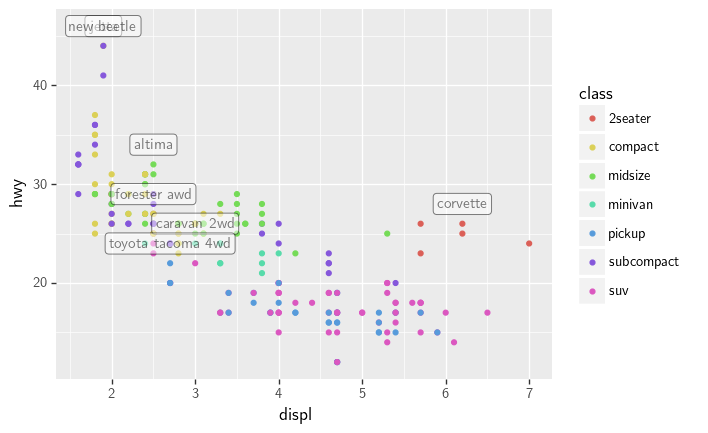

<ggplot: (298398861)>

In [7]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

That helps a bit, but if you look closely in the top-left hand corner, you'll notice that there are two labels practically on top of each other. This happens because the highway mileage and displacement for the best cars in the compact and subcompact categories are exactly the same. There's no way that we can fix these by applying the same transformation for every label. Instead, we can use the adjust_text argument. This useful argument, which employs the adjustText package under the hood, will automatically adjust labels so that they don't overlap:

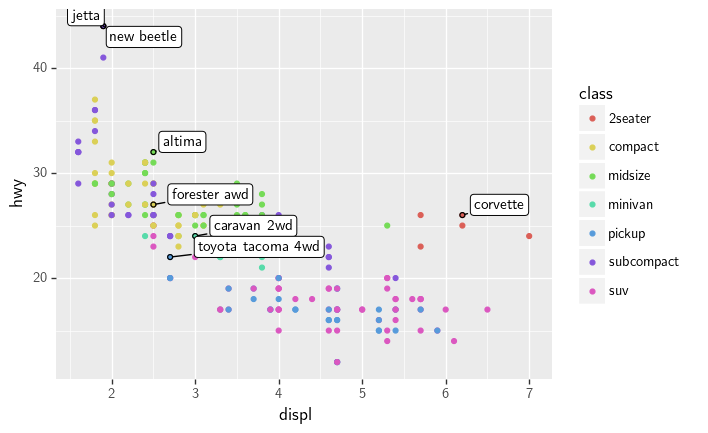

<ggplot: (297851769)>

In [8]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_point(data=best_in_class, fill='none') +\
geom_label(aes(label="model"), data=best_in_class, adjust_text={
    'expand_points': (1.5, 1.5),
    'arrowprops': {
        'arrowstyle': '-'
    }})

Note another handy technique used here: I added a second layer of large, hollow points to highlight the points that I've labelled.

You can sometimes use the same idea to replace the legend with labels placed directly on the plot. It's not wonderful for this plot, but it isn't too bad. (`theme(legend_position="none"`) turns the legend off --- we'll talk about it more shortly.)

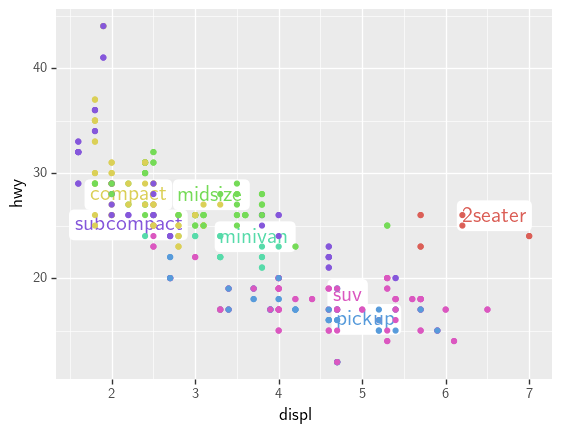

<ggplot: (298857529)>

In [9]:
class_avg = mpg\
.groupby("class")["displ","hwy"].median()\
.reset_index()

ggplot(mpg, aes("displ", "hwy", colour="class")) +\
geom_point() +\
geom_label(aes(label="class"), data=class_avg, size=16, label_size=0, adjust_text={'expand_points': (0, 0)}) +\
geom_point() +\
theme(legend_position="none")

Alternatively, you might just want to add a single label to the plot, but you'll still need to create a DataFrame. Often, you want the label in the corner of the plot, so it's convenient to create a new DataFrame using `pd.DataFrame()` and `max()` to compute the maximum values of x and y.

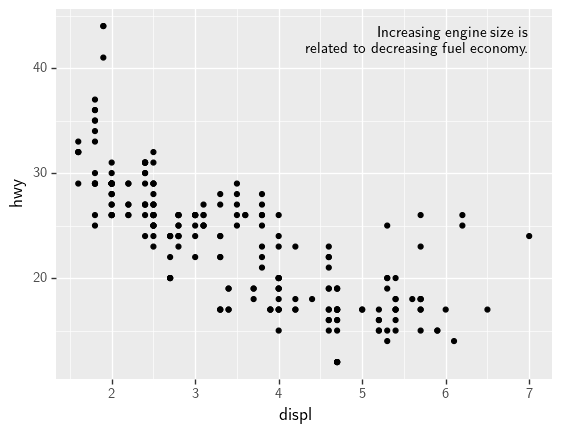

<ggplot: (299035189)>

In [10]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

If you want to place the text exactly on the borders of the plot, you can use `+np.Inf` and `-np.Inf`:

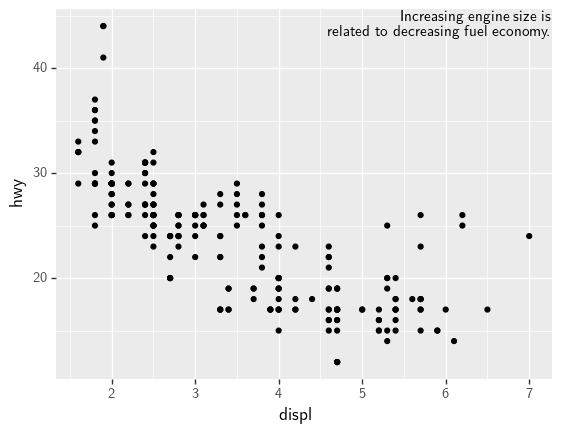

<ggplot: (299174101)>

In [11]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

In these examples, I manually broke the label up into lines using `"\n"`. Another approach is to use the `fill` function from the `textwrap` module to automatically add line breaks, given the number of characters you want per line:

In [12]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.


Note the use of `ha` and `va` to control the alignment of the label. The figure below shows all nine possible combinations.

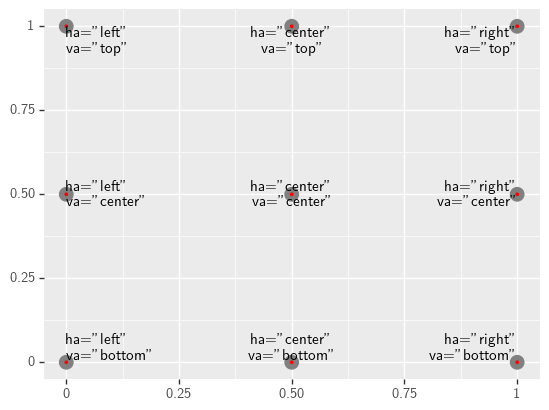

<ggplot: (299360713)>

In [13]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

Remember, in addition to `geom_text()`, you have many other geoms in plotnine available to help annotate your plot. A few ideas:

*   Use `geom_hline()` and `geom_vline()` to add reference lines. I often make
    them thick (`size=2`) and white (`colour="white"`), and draw them
    underneath the primary data layer. That makes them easy to see, without
    drawing attention away from the data.

*   Use `geom_rect()` to draw a rectangle around points of interest. The
    boundaries of the rectangle are defined by aesthetics `xmin`, `xmax`,
    `ymin`, `ymax`.

*   Use `geom_segment()` with the `arrow` argument to draw attention
    to a point with an arrow. Use aesthetics `x` and `y` to define the
    starting location, and `xend` and `yend` to define the end location.

The only limit is your imagination (and your patience with positioning annotations to be aesthetically pleasing)!

### [28.3.1](https://r4ds.had.co.nz/graphics-for-communication.html#exercises-72)&nbsp;&nbsp;&nbsp;Exercises

1.  Use `geom_text()` with infinite positions to place text at the
    four corners of the plot.

1.  Read the documentation for `annotate()`. How can you use it to add a text
    label to a plot without having to create a tibble?

1.  How do labels with `geom_text()` interact with faceting? How can you
    add a label to a single facet? How can you put a different label in
    each facet? (Hint: think about the underlying data.)

1.  What arguments to `geom_label()` control the appearance of the background
    box?

1.  What are the four arguments to `arrow()`? How do they work? Create a series
    of plots that demonstrate the most important options.

## [28.4](https://r4ds.had.co.nz/graphics-for-communication.html#scales)&nbsp;&nbsp;&nbsp;Scales

The third way you can make your plot better for communication is to adjust the scales. Scales control the mapping from data values to things that you can perceive. Normally, plotnine automatically adds scales for you. For example, when you type:

```python
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))
```

plotnine automatically adds default scales behind the scenes:

```python
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
scale_x_continuous() +\
scale_y_continuous() +\
scale_colour_discrete()
```

Note the naming scheme for scales: `scale_` followed by the name of the aesthetic, then `_`, then the name of the scale. The default scales are named according to the type of variable they align with: continuous, discrete, datetime, or date. There are lots of non-default scales which you'll learn about below.

The default scales have been carefully chosen to do a good job for a wide range of inputs. Nevertheless, you might want to override the defaults for two reasons:

*   You might want to tweak some of the parameters of the default scale.
    This allows you to do things like change the breaks on the axes, or the
    key labels on the legend.

*   You might want to replace the scale altogether, and use a completely
    different algorithm. Often you can do better than the default because
    you know more about the data.

### [28.4.1](https://r4ds.had.co.nz/graphics-for-communication.html#axis-ticks-and-legend-keys)&nbsp;&nbsp;&nbsp;Axis ticks and legend keys

There are two primary arguments that affect the appearance of the ticks on the axes and the keys on the legend: `breaks` and `labels`. Breaks controls the position of the ticks, or the values associated with the keys. Labels controls the text label associated with each tick/key. The most common use of `breaks` is to override the default choice:

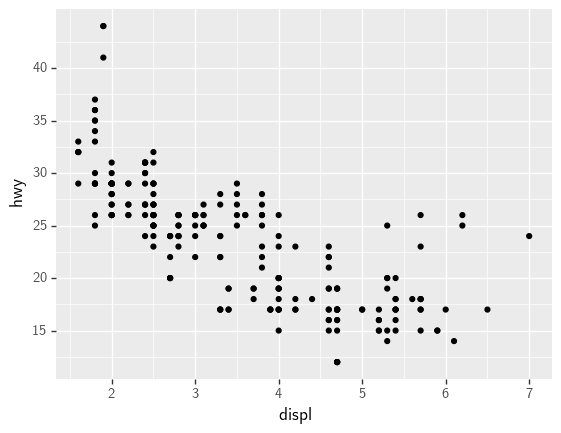

<ggplot: (299022121)>

In [14]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

You can use `labels` in the same way (a list of strings the same length as `breaks`), but you can also suppress the labels altogether by passing a list of empty strings. This is useful for maps, or for publishing plots where you can't share the absolute numbers. Note that the list of labels needs to be of the same length as the list of values, so a helper function like `no_labels` is helpful:

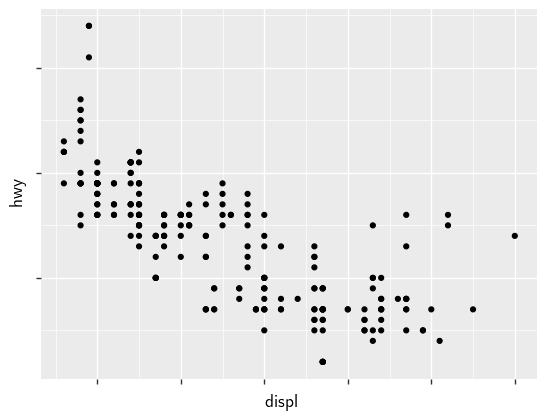

<ggplot: (298690777)>

In [15]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

You can also use `breaks` and `labels` to control the appearance of legends. Collectively axes and legends are called __guides__. Axes are used for x and y aesthetics; legends are used for everything else.

Another use of `breaks` is when you have relatively few data points and want to highlight exactly where the observations occur. For example, take this plot that shows when each US president started and ended their term.

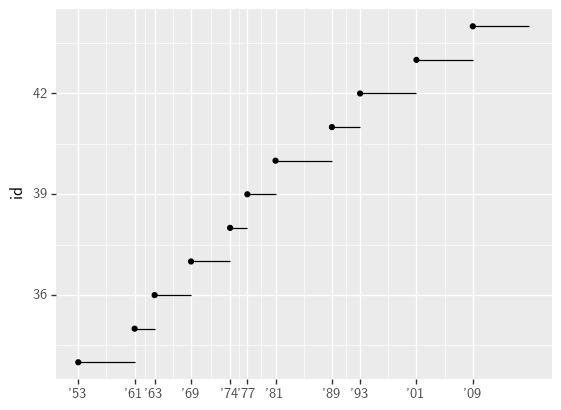

<ggplot: (297711237)>

In [16]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

Note that the specification of breaks and labels for date and datetime scales is a little different:

* `date_labels` takes a format specification, in the same form as `time.strptime()`.

* `date_breaks` (not shown here), takes a string like "2 days" or "1 month".

### [28.4.2](https://r4ds.had.co.nz/graphics-for-communication.html#legend-layout)&nbsp;&nbsp;&nbsp;Legend layout

You will most often use `breaks` and `labels` to tweak the axes. While they both also work for legends, there are a few other techniques you are more likely to use.

To control the overall position of the legend, you need to use a `theme()` setting. We'll come back to themes at the end of the chapter, but in brief, they control the non-data parts of the plot. The theme setting `legend_position` controls where the legend is drawn:

<!-- START_HIDE_MD -->

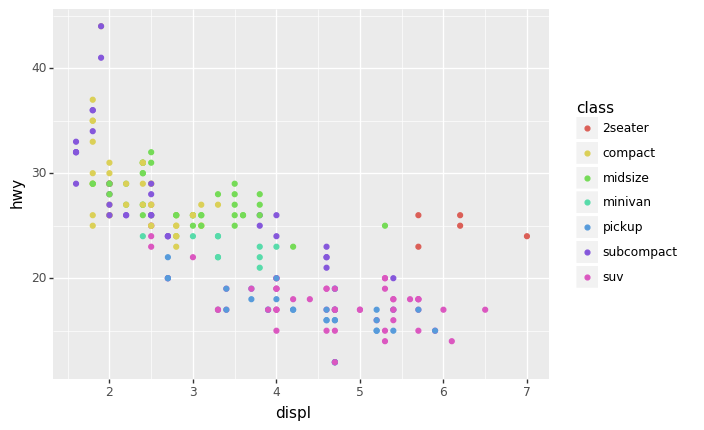

<ggplot: (295834505)>

In [7]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

base + theme(legend_position="right") # the default

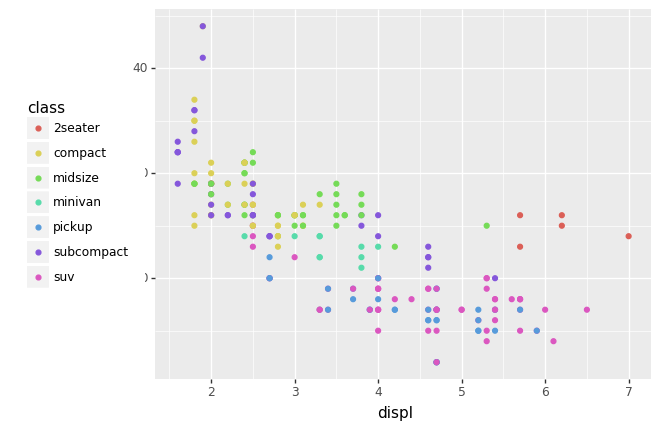

<ggplot: (296029513)>

In [4]:
base + theme(legend_position="left")

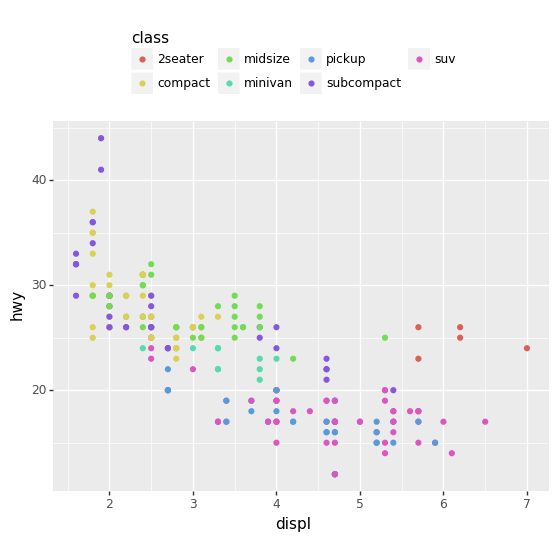

<ggplot: (295721613)>

In [5]:
base + theme(legend_position="top")

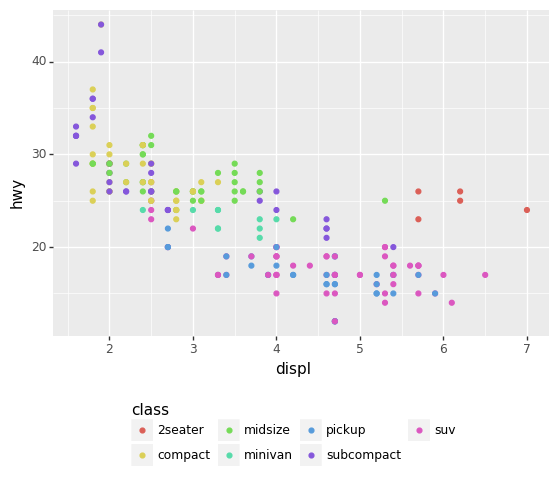

<ggplot: (296913969)>

In [43]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

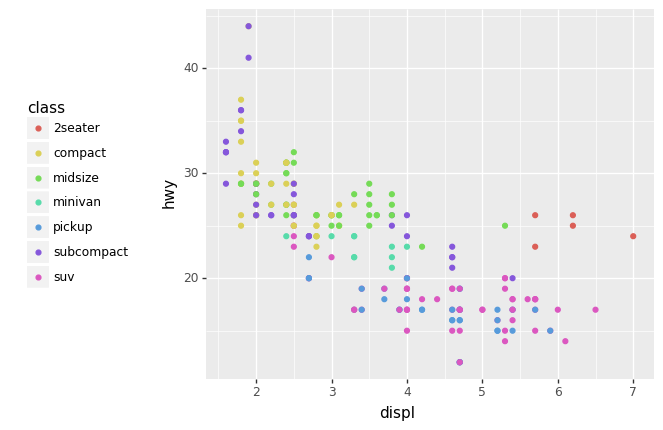

<ggplot: (296546493)>

In [37]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

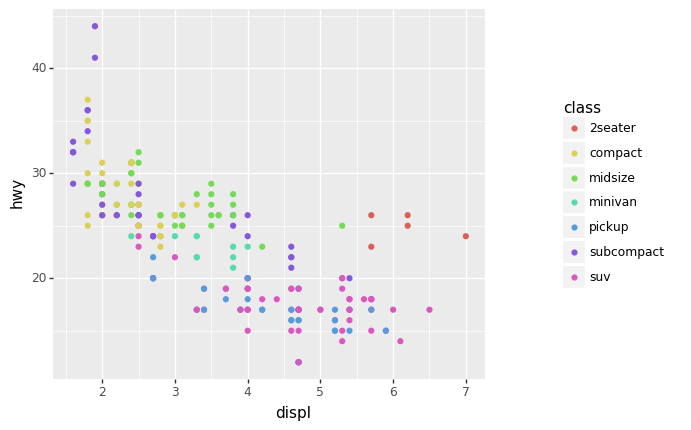

<ggplot: (296527921)>

In [40]:
base + theme(subplots_adjust={'right': 0.8}) + theme(legend_position=(1, 0.5))

In [ ]:
base + theme(subplots_adjust={'right': 0.8}) + theme(legend_position=(1, 0.5))

<!-- END_HIDE_MD -->

You can also use `legend_position="none"` to suppress the display of the legend altogether.

To control the display of individual legends, use `guides()` along with `guide_legend()` or `guide_colourbar()`. The following example shows two important settings: controlling the number of rows the legend uses with `nrow`, and overriding one of the aesthetics to make the points bigger. This is particularly useful if you have used a low `alpha` to display many points on a plot.

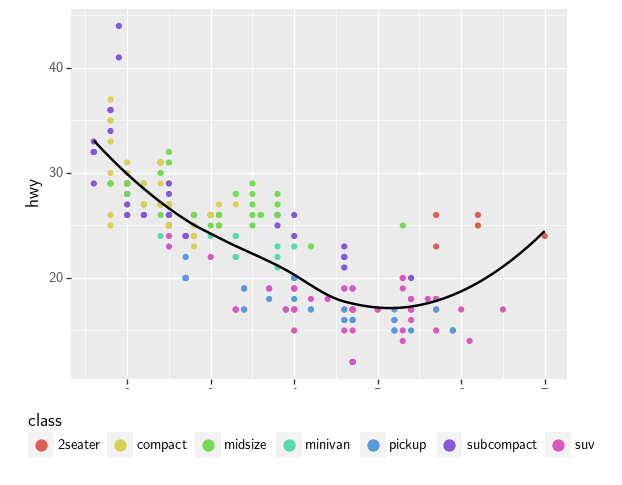

<ggplot: (299540353)>

In [22]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))

In [45]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

In [48]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

In [50]:
?scale_colour_brewer

Init signature: scale_colour_brewer(type='seq', palette=1, **kwargs)
Docstring:     
Sequential, diverging and qualitative discrete color scales

See `colorbrewer.org <http://colorbrewer2.org/>`_

Parameters
----------
type : str in ``['seq', 'div', 'qual']``
    Type of data. Sequential, diverging or qualitative
palette : int | str
     If a string, will use that named palette.
     If a number, will index into the list of palettes
     of appropriate type. Default is 1
breaks : array_like or callable, optional
    Major break points. Alternatively, a callable that
    takes a tuple of limits and returns a list of breaks.
    Default is to automatically calculate the breaks.
expand : array_like, optional
    Multiplicative and additive expansion constants
    that determine how the scale is expanded. If
    specified must of of length 2 or 4. Specifically the
    the values are of this order::

        (mul, add)
        (mul_low, add_low, mul_high, add_high)

    If not specified, su

In [53]:
import palettable.colorbrewer as brewer

print([k for k in brewer.COLOR_MAPS['Sequential'].keys()])
print([k for k in brewer.COLOR_MAPS['Qualitative'].keys()])
print([k for k in brewer.COLOR_MAPS['Diverging'].keys()])

['Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']
['Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3']
['BrBG', 'PiYG', 'PRGn', 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral']


In [54]:
pd.cut?

Signature:
pd.cut(
    x,
    bins,
    right=True,
    labels=None,
    retbins=False,
    precision=3,
    include_lowest=False,
    duplicates='raise',
)
Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

Parameters
----------
x : array-like
    The input array to be binned. Must be 1-dimensional.
bins : int, sequence of scalars, or IntervalIndex
    The criteria to bin by.

    * int : Defines the number of equal-width bins in the range of `x`. The
      range of `x` is extended by .1% on each side to include the minimum
      and maximum values of `x`.
    * sequence of scalars : Defines the bin edges allowing for non-uniform
      width. No extension of the range of `x` is done.
    

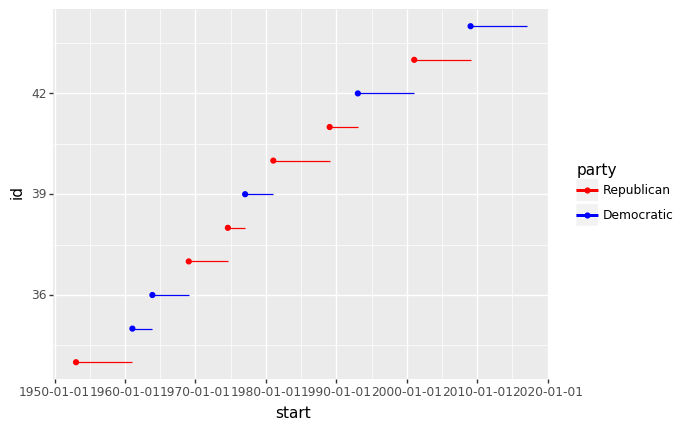

<ggplot: (302850997)>

In [62]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

In [57]:
scale_colour_manual?

Init signature: scale_colour_manual(values, **kwargs)
Docstring:     
Custom discrete color scale

Parameters
----------
values : array_like
    Colors that make up the palette.
breaks : array_like or callable, optional
    Major break points. Alternatively, a callable that
    takes a tuple of limits and returns a list of breaks.
    Default is to automatically calculate the breaks.
expand : array_like, optional
    Multiplicative and additive expansion constants
    that determine how the scale is expanded. If
    specified must of of length 2 or 4. Specifically the
    the values are of this order::

        (mul, add)
        (mul_low, add_low, mul_high, add_high)

    If not specified, suitable defaults are chosen.
name : str, optional
    Name used as the label of the scale. This is what
    shows up as the axis label or legend title. Suitable
    defaults are chosen depending on the type of scale.
labels : list or callable, optional
    List of :class:`str`. Labels at the `break

In [63]:
ggplot(df, aes("x", "y")) +\
geom_hex() +\
scale_colour_gradient(low="white", high="red") +\
coord_fixed()

NameError: name 'df' is not defined

In [65]:
mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater


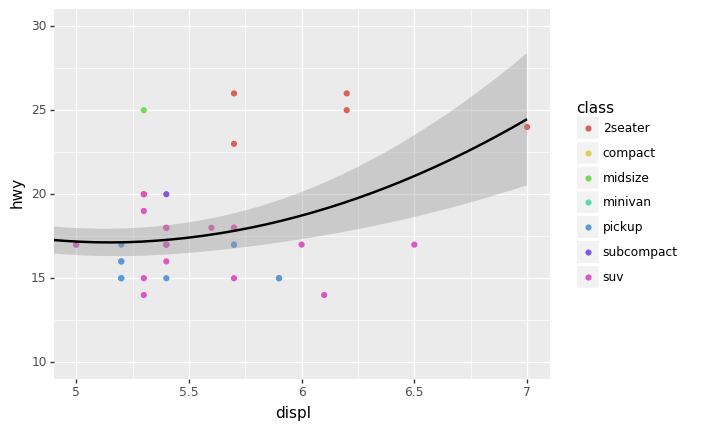

<ggplot: (302860849)>

In [72]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

In [69]:
?ggplot

Init signature: ggplot(mapping=None, data=None, environment=None)
Docstring:     
Create a new ggplot object

Parameters
----------
aesthetics : aes
    Default aesthetics for the plot. These will be used
    by all layers unless specifically overridden.
data :  dataframe
    Default data for for plot. Every layer that does not
    have data of its own will use this one.
environment : dict, ~patsy.Eval.EvalEnvironment
    If a variable defined in the aesthetic mapping is not
    found in the data, ggplot will look for it in this
    namespace. It defaults to using the environment/namespace.
    in which `ggplot()` is called.
File:           ~/repos/datascienceworkshops/r4ds-python-plotnine/venv/lib/python3.7/site-packages/plotnine/ggplot.py
Type:           type
Subclasses:     
